                                                EMAIL_SPAM_CLASSIFIER

In [2]:
##Author : Saroj kumar
##College : IIT JODHPUR
##MODEL USED : LR, SVM, XGBOOST, ADABOOST, RANDOMFOREST


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("spam.csv",encoding='ISO-8859-1')

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df = df.drop(columns = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [ ]:
df.rename(columns={"v1":"target","v2":"text"},inplace = True)

In [ ]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["target"] = le.fit_transform(df["target"])

In [ ]:
df #0 - Not Spam
   #1 - Spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(keep="first",inplace=True) #removing the duplicates value from the dataset


In [ ]:
df.duplicated().sum()

0

In [ ]:
# EDA

<ipython-input-29-f4209bc902bd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["target"])


<Axes: xlabel='target', ylabel='Density'>

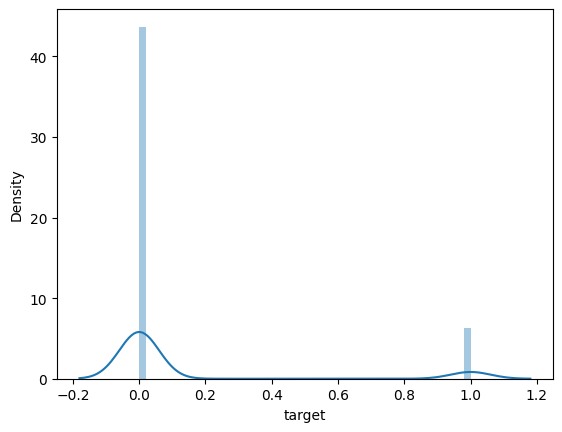

In [ ]:
sns.distplot(df["target"])

In [ ]:
import matplotlib.pyplot as plt

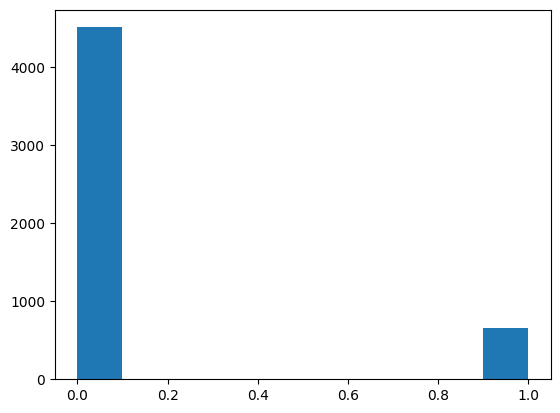

In [ ]:
plt.hist(df["target"])
plt.show()

In [ ]:
df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x7d80c2744dc0>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.367'),
  Text(0.5533635081542612, -0.23192418555038377, '12.633')])

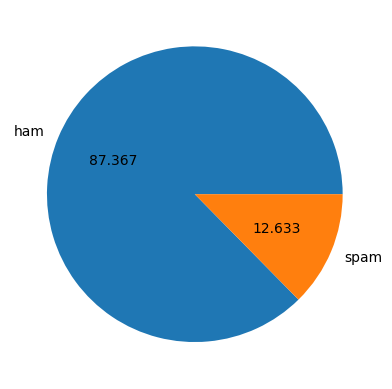

In [ ]:
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.3f")

In [ ]:
import nltk
nltk.download("punkt")
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df["num_characters"] = df["text"].apply(len)
def count_words(text):
  words = word_tokenize(text)
  return len(words)

In [ ]:
df["num_words"] = df["text"].apply(count_words)

In [ ]:
df["num_sentences"] = df["text"].apply(lambda x : len(sent_tokenize(x)))

In [ ]:
df


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


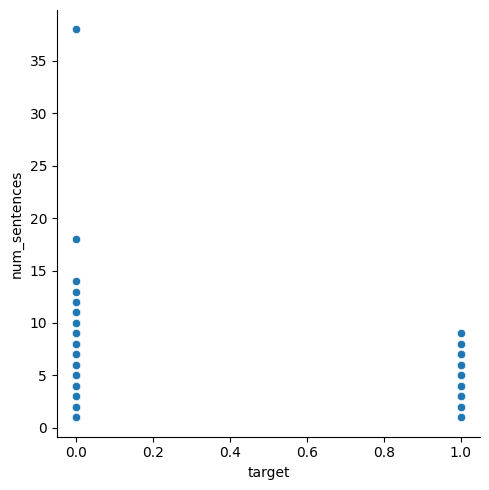

In [ ]:
sns.relplot(kind="scatter",x="target",y="num_sentences",data=df)

In [ ]:
df[df["target"] == 0].describe()

,target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [ ]:
df[df["target"] == 1].describe()

,target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<ipython-input-42-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

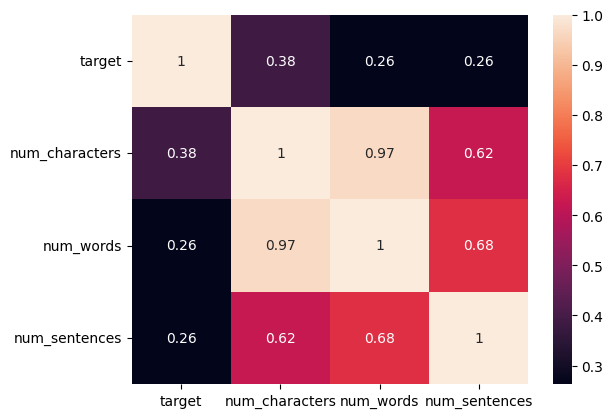

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
## clearly from the above heatmap , we can see target is more related to num_characters

In [ ]:
## Data Preprocessing
## 1. convert to lowercase
## 2. remove stop words and special characters
## 3. stemming(conversion of similar words to their root words : dance, dancing , danced == dance)

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
def transform(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = list(y)
  y.clear()

  for i in text:
    if i not in stopwords.words("english"):
      y.append(i)

  text = list(y)
  y.clear()

  for i in text:
    if i not in string.punctuation:
      y.append(i)

  text = list(y)
  y.clear()

  for i in text:
    y.append(ps.stem(i))


  return " ".join(y)

In [ ]:
transform("hi i am laughing")

'hi laugh'

In [ ]:
df["transformed_text"] = df["text"].apply(transform)

In [ ]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
whole_text = (df[df["target"] == 1]["transformed_text"]).to_list()
text_data = " ".join(whole_text)
text_data

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18 freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030 six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt messag click http england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq thank subscript rington uk mobil charg pleas confirm repli ye repli charg 07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow sm ac sptv new jersey devil detroit red w

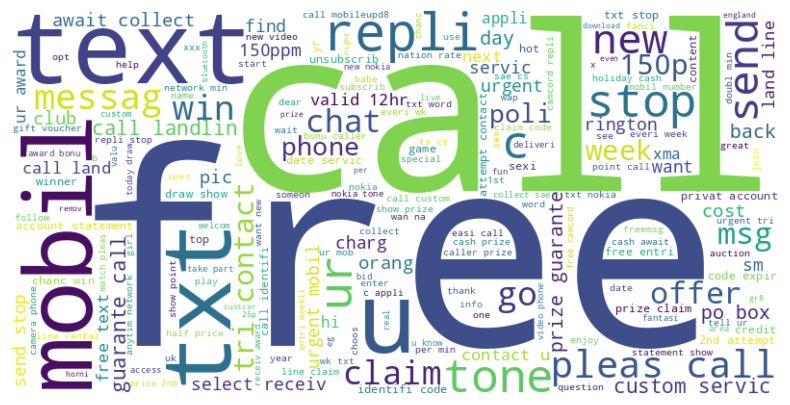

In [ ]:



# Split the text into words (assuming space-separated words)
word_list = text_data.split()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
whole_text = (df[df["target"] == 0]["transformed_text"]).tolist()
text_data = " ".join(whole_text)
text_data

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat ok lar joke wif u oni u dun say earli hor u c alreadi say nah think goe usf live around though even brother like speak treat like aid patent per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun gon na home soon want talk stuff anymor tonight k cri enough today search right word thank breather promis wont take help grant fulfil promis wonder bless time date sunday oh k watch eh u rememb 2 spell name ye v naughti make v wet fine thatåõ way u feel thatåõ way gota b serious spell name go tri 2 month ha ha joke pay first lar da stock comin aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi ffffffffff alright way meet sooner forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol lol alway convinc catch bu fri egg make tea eat mom left dinner feel love back amp pack car let know room ahhh work vagu rememb feel like lol wait sti

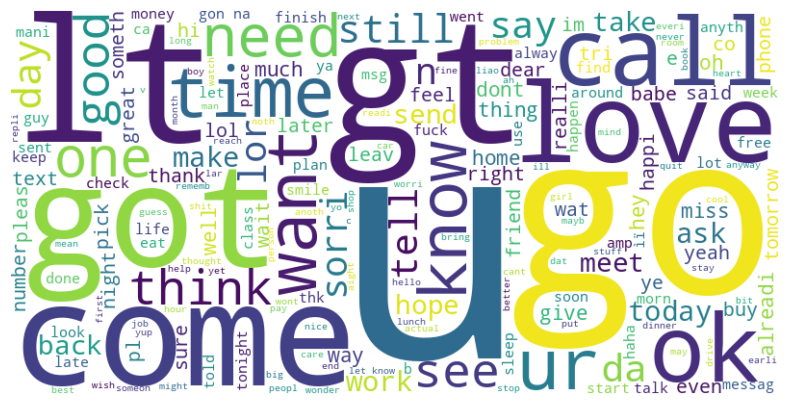

In [ ]:


# Split the text into words (assuming space-separated words)
word_list = text_data.split()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
from collections import Counter
word_list = text_data.split()

In [ ]:
new_df = pd.DataFrame(Counter(word_list).most_common(30))
new_df = new_df.rename(columns={"0" : "word","1":"count"})
# sns.catplot(x="0", y="1", kind="bar",data=new_df)

##Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfid.fit_transform(df["transformed_text"]).toarray()

In [ ]:
X.shape

(5169, 6708)

In [ ]:
y = df["target"].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gb = GaussianNB()
bb = BernoulliNB()
mb = MultinomialNB()

In [ ]:
gb.fit(X_train,y_train)
y_pred1 = gb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [ ]:
bb.fit(X_train,y_train)
y_pred1 = bb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
mb.fit(X_train,y_train)
y_pred1 = mb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [ ]:
#tfidf + MultinomialNB

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

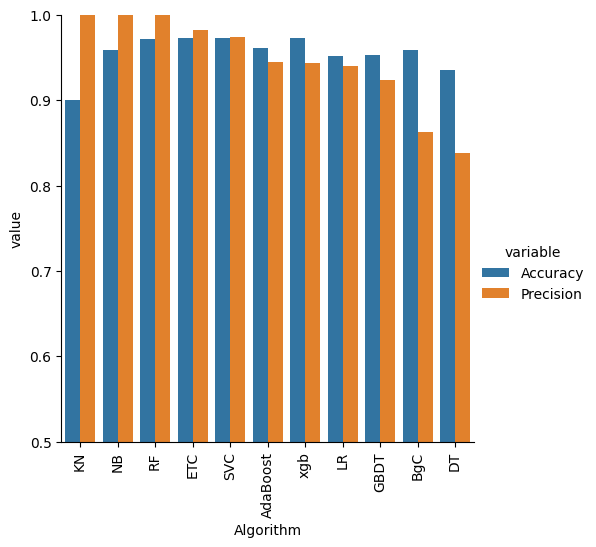

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

VOTING

In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 1.0


STACKING

In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9538461538461539


FINAL MODEL

In [ ]:
# Model which is performing best is MultinomialNaiveBayes
# Accuracy : 0.9593810444874274
# Precision : 1.0

#Here, Precision is more important aspect.